# Euler pole rotation of tectonic plates
Rotation of a rigid across the surface of a sphere.

## 1. Importing dependencies

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 2. Plotting a spherical coordinate system
![](https://upload.wikimedia.org/wikipedia/commons/5/51/Spherical_Coordinates_%28Colatitude%2C_Longitude%29.svg)

A function that plots a spherical coordinate system in the form of circles at constant latitudes and longitudes.
The coladiutde is $\theta$ and the longitude is $\phi$

In [19]:
def plot_sphere():
    # 10 degrees to radians
    d = np.deg2rad(10)

    # Colatitude (\theta) and longitude (phi)
    theta = np.arange(0.0, 19.0*d, d)
    phi = np.arange(0.0, 37.0*d, d)

    # Plotting lines of constant colatitude (\theta)
    for i in range(len(theta)):
        x = np.cos(phi) * np.sin(theta[i])
        y = np.sin(phi) * np.sin(theta[i])
        z = np.cos(theta[i])
        ax.plot(x, y, z, color=(0.8, 0.8, 0.8), linewidth=0.5)

    for i in range(len(phi)):
        x = np.cos(phi[i])*np.sin(theta)
        y = np.sin(phi[i])*np.sin(theta)
        z = np.cos(theta)
        ax.plot(x, y, z, color=(0.7, 0.7, 0.7), linewidth=0.5)
    
    # Make the panes transparent.
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    # Make the grid lines transparent.
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0)
    # Arrange and label axes.
    ax.set_aspect('auto', 'box')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


## 3. Plotting tectonic plates

/var/folders/gm/jk1nxk7d22b758zbyq_pjb980000gn/T/ipykernel_24990/3407825810.py:9: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax=fig.gca(projection='3d')


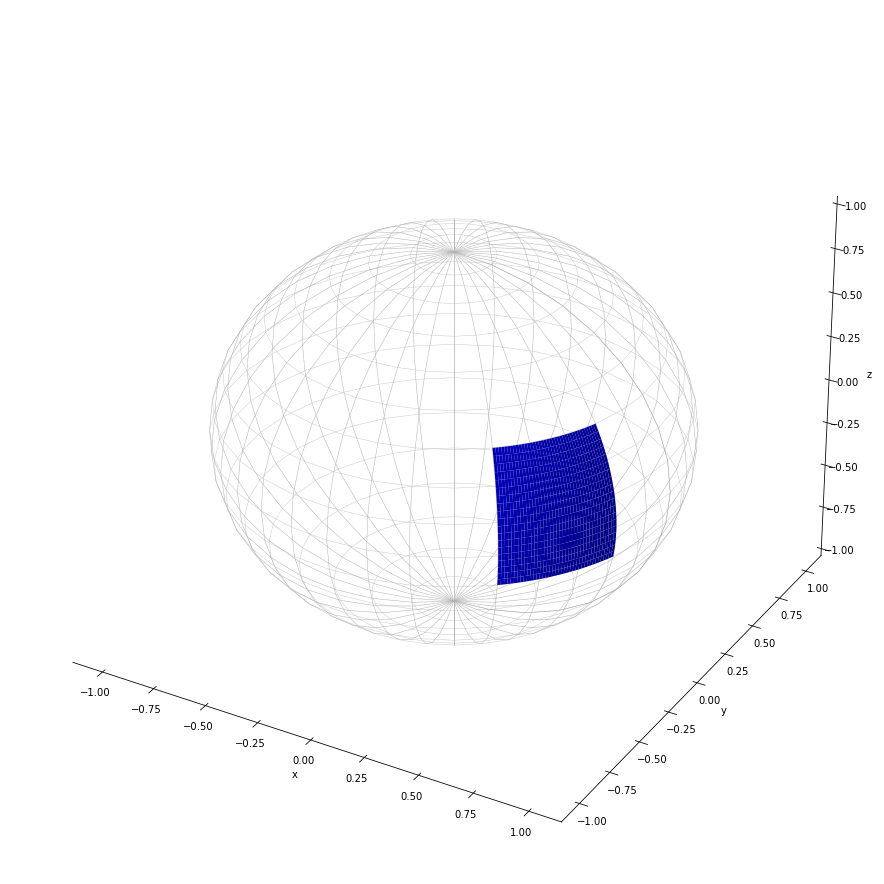

In [22]:
# Latitude and longitude ranges [degrees] of the tectonic plate.
lat_min = -10.0
lat_max = 30.0
lon_min = -50.0
lon_max = -20.0

# Initiate a new figure.
fig = plt.figure(figsize=(18, 16))
ax = fig.gca(projection='3d')

# Plot the spherical coordinate system.
plot_sphere()

# Compute longitude and colatitude points of the tectonic plate on the unit sphere.
phi = np.linspace(lon_min*np.pi/180.0, lon_max*np.pi/180.0, 40)
theta = np.linspace((90.0-lat_max)*np.pi/180.0, (90.0-lat_min)*np.pi/180.0, 20)

# Compute the corresponding Cartesian x, y, and z coordinates.
x = np.outer(np.cos(phi), np.sin(theta))
y = np.outer(np.sin(phi), np.sin(theta))
z = np.outer(np.ones(np.size(phi)), np.cos(theta))

# Plot the plate.
ax.plot_surface(x, y, z, color='b')
plt.show()


/var/folders/gm/jk1nxk7d22b758zbyq_pjb980000gn/T/ipykernel_24990/1240592729.py:19: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


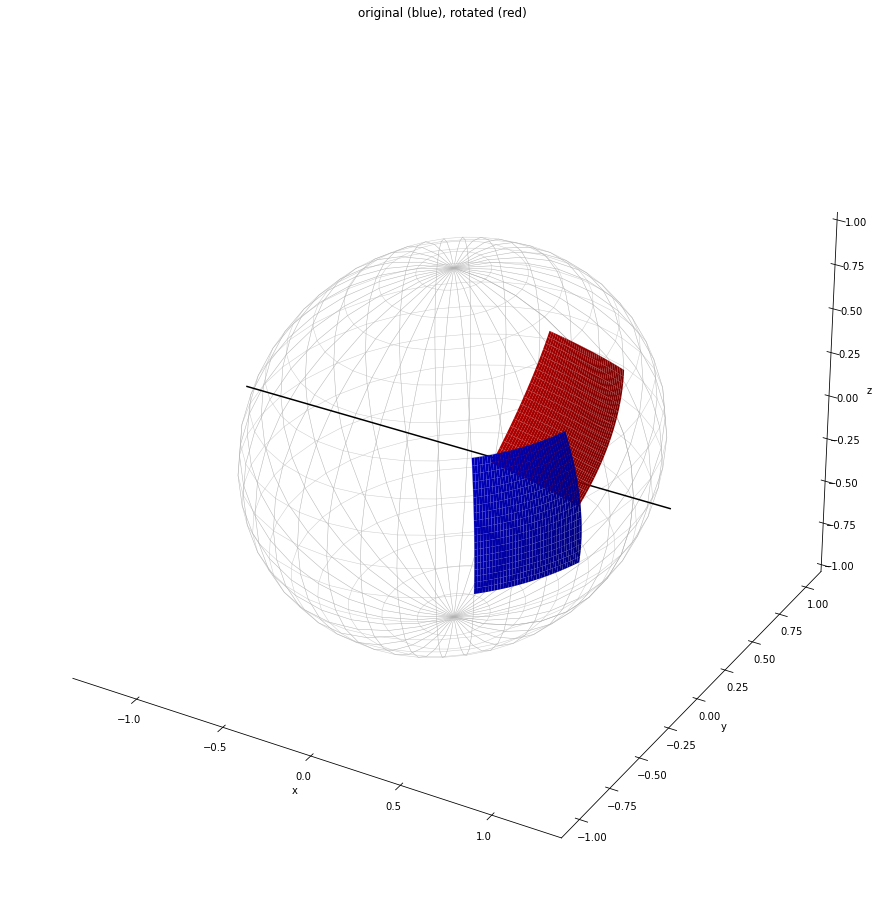

In [23]:
# Initialize the rotated coordinates of points within the plate.
x_rot = np.zeros(np.shape(x))
y_rot = np.zeros(np.shape(y))
z_rot = np.zeros(np.shape(z))

# Choose a rotation angle.
alpha = -50.0*np.pi/180.0

# Rotate the points within the original plate.
for i in range(len(phi)):
    for j in range(len(theta)):

        x_rot[i, j] = x[i, j]
        y_rot[i, j] = np.cos(alpha)*y[i, j]-np.sin(alpha)*z[i, j]
        z_rot[i, j] = np.sin(alpha)*y[i, j]+np.cos(alpha)*z[i, j]

# Plot the spherical coordinate system.
fig = plt.figure(figsize=(18, 16))
ax = fig.gca(projection='3d')
plot_sphere()

# Plot the x-axis for visual orientation.
ax.plot((-1.2, 1.2), (0.0, 0.0), (0.0, 0.0), 'k', linewidth=1.5)

# Plot the original and rotated positions of the plate.
ax.plot_surface(x, y, z, color='b')
ax.plot_surface(x_rot, y_rot, z_rot, color='r')
plt.title('original (blue), rotated (red)')
plt.show()
